In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
#Importing data
Beijing = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/BeijingPM20100101_20151231.csv")

In [3]:
#Delet non-useful data
Beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'season', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)
#Beijing.sum()

In [4]:
Beijing.dropna(axis=0, how="any",inplace=True)

In [5]:
# from datetime import datetime
Beijing['Time'] = pd.to_datetime(Beijing['year'].map(str) +"/"+ Beijing['month'].map(str) +"/"+ Beijing['day'].map(str)+" "+Beijing['hour'].map(str)+":00:00")
#Beijing

In [6]:
#Beijing.groupby(['year']).size()

In [7]:
by_hour = Beijing.groupby(['Time']).mean()
#by_hour

In [8]:
by_hour.index = pd.to_datetime(by_hour.index, 
                             format='%d-%m-%Y %H:%M:%S')
by_hour = by_hour.set_index(by_hour.index).asfreq('H')
by_hour = by_hour.fillna(method='ffill')
#by_hour.index

In [9]:
by_hour['Time'] = by_hour.index

In [10]:
data_13 = by_hour[(by_hour['Time'] >=pd.to_datetime('20130101000000')) & (by_hour['Time'] <= pd.to_datetime('20140101000000'))]

In [11]:
##len(data_13.index)

In [12]:
data_13 = data_13.set_index(data_13.index).asfreq('H')
#data_13.index
#data_1314.index
pm_data = data_13['PM_US Post']

In [13]:
df = data_13
df['y'] = data_13['PM_US Post']
df['ds'] = data_13['Time']
df.head()

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time,y,ds
Time,,,,,,,,,,,,,,
2013-01-01 00:00:00,26305.0,2013.0,1.0,1.0,0.0,31.0,-10.0,67.0,1018.0,-5.0,5.81,2013-01-01 00:00:00,31.0,2013-01-01 00:00:00
2013-01-01 01:00:00,26306.0,2013.0,1.0,1.0,1.0,32.0,-11.0,73.0,1017.0,-7.0,9.83,2013-01-01 01:00:00,32.0,2013-01-01 01:00:00
2013-01-01 02:00:00,26307.0,2013.0,1.0,1.0,2.0,21.0,-11.0,73.0,1017.0,-7.0,11.62,2013-01-01 02:00:00,21.0,2013-01-01 02:00:00
2013-01-01 03:00:00,26308.0,2013.0,1.0,1.0,3.0,16.0,-14.0,72.0,1018.0,-10.0,14.75,2013-01-01 03:00:00,16.0,2013-01-01 03:00:00
2013-01-01 04:00:00,26309.0,2013.0,1.0,1.0,4.0,15.0,-15.0,66.0,1018.0,-10.0,0.45,2013-01-01 04:00:00,15.0,2013-01-01 04:00:00


In [14]:
m = Prophet(yearly_seasonality=True)
m.fit(df);

In [15]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
8816,2014-02-26
8817,2014-02-27
8818,2014-02-28
8819,2014-03-01
8820,2014-03-02


In [16]:
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                      ds        yhat  yhat_lower  yhat_upper
0    2013-01-01 00:00:00   70.331282  -40.575923  183.602788
1    2013-01-01 01:00:00   69.462848  -41.846369  181.078934
2    2013-01-01 02:00:00   66.861404  -42.899209  181.576109
3    2013-01-01 03:00:00   62.979471  -58.062191  175.318790
4    2013-01-01 04:00:00   59.347770  -51.817052  166.773262
...                  ...         ...         ...         ...
8816 2014-02-26 00:00:00  221.110762  108.508246  331.980272
8817 2014-02-27 00:00:00  202.688948   92.074879  324.132945
8818 2014-02-28 00:00:00  220.921012  110.204280  343.424980
8819 2014-03-01 00:00:00  237.106906  125.581438  357.640870
8820 2014-03-02 00:00:00  246.629116  136.818728  368.457354

[8821 rows x 4 columns]


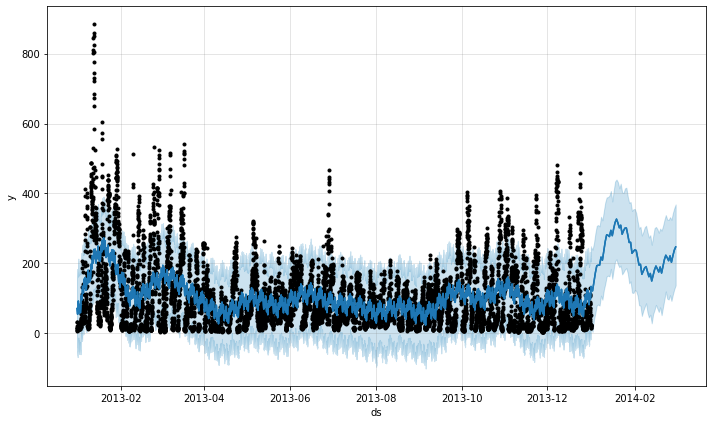

In [17]:
m.plot(forecast)

x1 = forecast['ds']
y1 = forecast['yhat']
  
plt.plot(x1,y1)
plt.show()

In [18]:
data_1314 = by_hour[(by_hour['Time'] >=pd.to_datetime('20130101000000')) & (by_hour['Time'] <= pd.to_datetime('20140301000000'))]

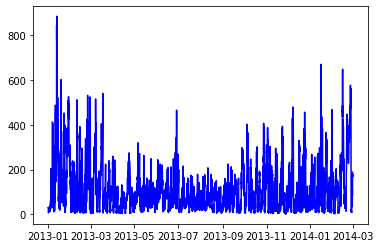

In [19]:
plt.plot(data_1314['PM_US Post'], color='blue', label='Original')